In [6]:
from rl.helpers import Load_data, plotly_data, matplot_data
#Test Function
environment = 'AbstractConveyor'
subdir = '20201123_0044'


import from tensorboard event done


import from tensorboard event done


import from tensorboard event done


import from tensorboard event done


import from tensorboard event done


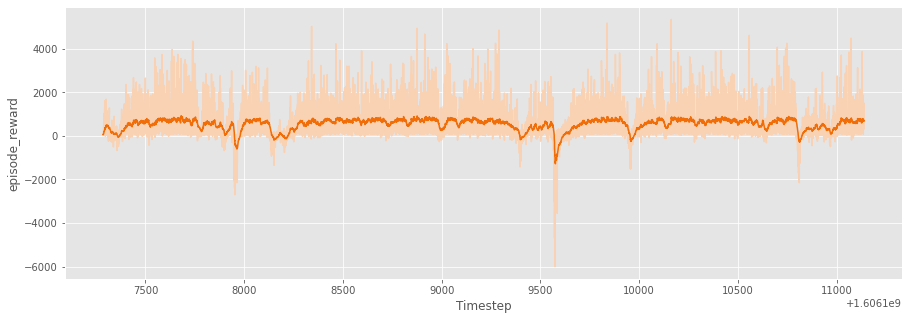

In [7]:
scalar = 'episode_reward'
timevar = 'wall_time' # wall_time or step
reward = Load_data(environment, subdir, scalar=scalar)
matplot_data(reward, scalar, timevar=timevar)

import from tensorboard event done


import from tensorboard event done


import from tensorboard event done


import from tensorboard event done


import from tensorboard event done


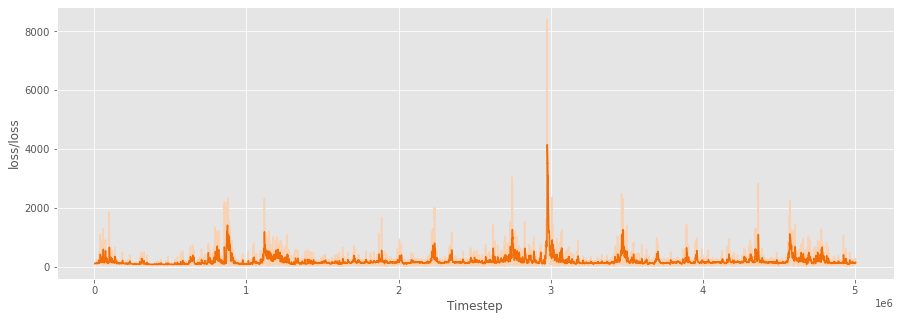

In [8]:
scalar = 'loss/loss'
timevar = 'step' # wall_time or steps
loss = Load_data(environment, subdir, scalar=scalar)
matplot_data(loss, scalar, timevar=timevar)